In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.14.0


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(80):
 plt.subplot(8,10, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(train_images[i], cmap='gray_r')
 plt.xlabel(train_labels[i])
plt.show()

In [ ]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model
inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)
#모델 요약 정보를 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics = ["accuracy"])

In [ ]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 22s - loss: 0.5281 - accuracy: 0.8360 - val_loss: 0.2853 - val_accuracy: 0.9144 - 22s/epoch - 12ms/step
Epoch 2/5
1875/1875 - 15s - loss: 0.2715 - accuracy: 0.9196 - val_loss: 0.2204 - val_accuracy: 0.9355 - 15s/epoch - 8ms/step
Epoch 3/5
1875/1875 - 15s - loss: 0.2202 - accuracy: 0.9354 - val_loss: 0.2056 - val_accuracy: 0.9415 - 15s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 15s - loss: 0.1980 - accuracy: 0.9429 - val_loss: 0.1657 - val_accuracy: 0.9541 - 15s/epoch - 8ms/step
Epoch 5/5
1875/1875 - 16s - loss: 0.1757 - accuracy: 0.9494 - val_loss: 0.1680 - val_accuracy: 0.9539 - 16s/epoch - 8ms/step


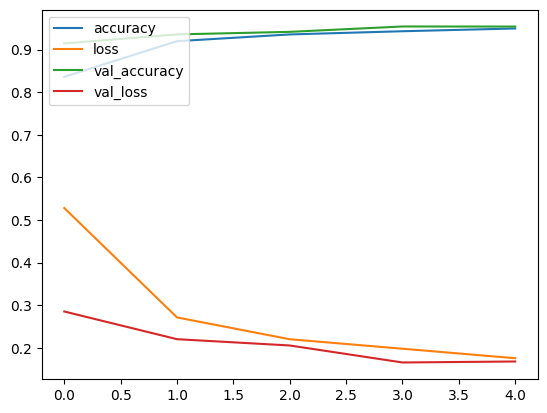

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [ ]:
res = model.predict(test_images[5:6] )
np.argmax(res)

1/1 [==============================] - 0s 75ms/step


1

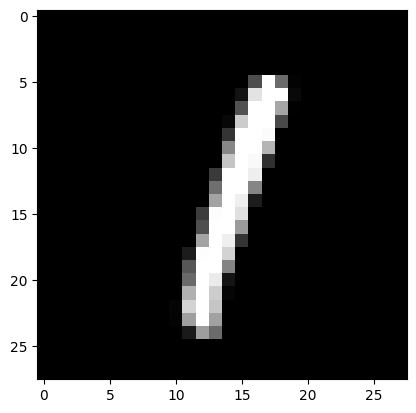

In [ ]:
plt.imshow(test_images[5] , cmap="gray")
plt.show()

# PyTorch로 해보기

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchsummary
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision import transforms as T
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from time import sleep

In [2]:
drive.mount('/content/drive')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

Mounted at /content/drive


'cuda'

In [4]:
train_dset = datasets.MNIST(root='./data', train=True, transform=T.ToTensor())
test_dset = datasets.MNIST(root='./data', train=False, transform=T.ToTensor())

RuntimeError: ignored